<a href="https://colab.research.google.com/github/neonithinar/GTRSB/blob/main/GTRSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GTSRB for oburcullum


In [1]:
! pip install split-folders

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pathlib
import cv2
import splitfolders


In [3]:
! wget "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip" -O temp.zip
! unzip temp.zip
! rm temp.zip

# dataset_url = "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip"
# data_dir = tf.keras.utils.get_file('GTRSB', origin=dataset_url, untar=True)
# data_dir = pathlib.Path(data_dir)

Streaming output truncated to the last 5000 lines.
  inflating: GTSRB/Final_Training/Images/00035/00000_00019.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00020.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00021.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00022.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00023.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00024.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00025.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00026.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00027.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00028.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00029.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00000.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00001.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00002.ppm  
  inflating: GTSRB/Final_Training/Image

In [4]:
data_dir = os.path.join("/content/GTSRB/Final_Training/Images")
img_width = 48
img_height = 48
ext = [".ppm"]
batch_size = 32

In [5]:
# complete_ds = keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

Seems like keras doesnot like the naming format for the filenames or folder names. so let's first replace the subfolder names with the actual class names of the traffic signals


In [6]:
name_dict = {"00000":"00000_speed_limit_20kmph",
             "00001":"00001_speed_limit_30_kmph",
             "00002":"00002_speed_limit_50_kmph",
             "00003":"00003_speed_limit_60_kmph",
             "00004":"00004_speed_limit_70_kmph",
             "00005":"00005_speed_limit_80_kmph",
             "00006":"00006_end_of_speed_limit", 
             "00007":"00007_speed_limit_100_kmph",
             "00008":"00008_speed_limit_120_kmph",
             "00009":"00009_no_passing", 
             "00010":"00010_no_passing_for_vehicles",
             "00011":"00011_right_of_way_at_the",
             "00012":"00012_priority_road",
             "00013":"00013_yeild",
             "00014":"00014_stop",
             "00015":"00015_no_vehicles",
             "00016":"00016_vehicles_over_34_metres",
             "00017":"00017_no_entry",
             "00018":"00018_general_caution",
             "00019":"00019_dangerous_curve_to_left",
             "00020":"00020_dangerous_curve_to_right",
             "00021":"00021_double_curve",
             "00022":"00022_bumpy_road",
             "00023":"00023_slippery_road",
             "00024":"00024_roads_narrows_on_the_right",
             "00025":"00025_road_work",
             "00026":"00026_traffic_signals",
             "00027":"00027_pedestrians",
             "00028":"00028_children_crossing",
             "00029":"00029_bicycle_crossing",
             "00030":"00030_beware_of_ice_or_snow",
             "00031":"00031_wild_animals_crossing",
             "00032":"00032_end_of_all_speed_and_passing",
             "00033":"00033_turn_right_ahead",
             "00034":"00034_turn_left_ahead",
             "00035":"00035_ahead_only",
             "00036":"00036_go_straight_or_right",
             "00037":"00037_go_straight_or_left",
             "00038":"00038_keep_right",
             "00039":"00039_keep_left",
             "00040":"00040_roundabout_mandatory",
             "00041":"00041_end_of_passing",
             "00042":"00042_end_of_no_passing_by"}

In [7]:
name_dict["00042"]

'00042_end_of_no_passing_by'

In [8]:
#Renaming the directories with class names

for root, dirs, files in os.walk(data_dir, topdown= False):
  dirs = sorted(dirs)
  for dir_name in dirs: 
    # print(root +"/"+ name)
    # print(name_dict[str(name)])
    rename_dir = root +"/"+ dir_name
    final_name = root +"/" + name_dict[str(dir_name)]
    os.rename(rename_dir, final_name)

In [9]:
# renaming the files
for root, dirs, files in os.walk(data_dir, topdown= False):
  dirs = sorted(dirs)
  for dir_name in dirs:
    for dir_root, _, sub_dir_files in os.walk(os.path.join(root + "/" + dir_name)):
      sub_dir_files = sorted(sub_dir_files)
      for filename in sub_dir_files:
        rename_file = dir_root+ "/" + filename
        new_name = dir_root+ "/" + "prefix_" +filename        
        _, ext = os.path.splitext(filename)
        if ext == ".ppm":
          os.rename(rename_file, new_name)
          i = cv2.imread(new_name)
          cv2.imwrite((new_name.strip(".ppm") + ".jpg"),i)
        else:
          os.remove(rename_file)
      
      

In [10]:
# create train, test and validation dirs with split folders
os.makedirs('GTRSB_final')
os.makedirs('GTRSB_final/train')
os.makedirs('GTRSB_final/test')
os.makedirs('GTRSB_final/val')

In [11]:
# split the data in GTRSB/Final_Training/Images into the above folders
output_folder = "/content/GTRSB_final"
# input folder is data_dir
splitfolders.ratio(data_dir, output= output_folder, seed = 42, ratio=(0.8, 0.1, 0.1))

Copying files: 78418 files [00:09, 8032.29 files/s]


In [12]:
train_dir = os.path.join('/content/GTRSB_final/train')
test_dir = os.path.join('/content/GTRSB_final/test')
val_dir = os.path.join('/content/GTRSB_final/val')

In [13]:
train_ds = keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=42, 
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 31339 files belonging to 43 classes.


In [14]:
val_ds = keras.preprocessing.image_dataset_from_directory(
  val_dir,
  seed=42, 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3921 files belonging to 43 classes.


In [15]:
test_ds = keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=42, 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3949 files belonging to 43 classes.


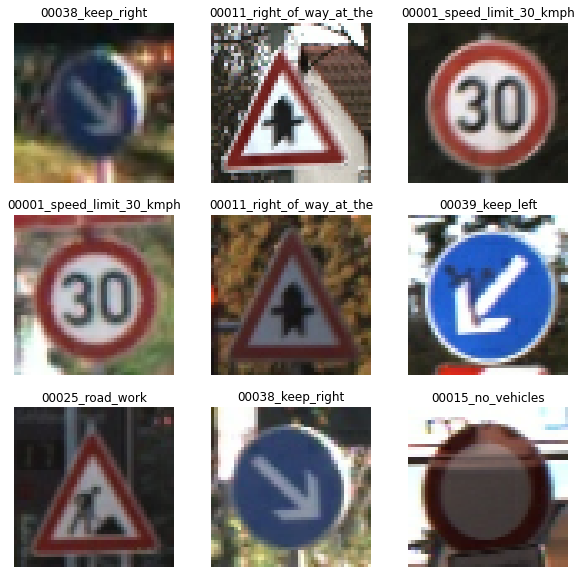

In [20]:
train_class_names = train_ds.class_names
plt.figure(figsize= (10, 10))
for images, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_class_names[label[i]])
    plt.axis("off")

In [21]:
# def image_preprocess(image):
#   image = tf.image.resize(image, [48, 48])
# normalization_layer = keras.layers.experimental.preprocessing.Rescaling(1./ 255)
AUTOTUNE = tf.data.AUTOTUNE


In [22]:


def preprocess_dataset(ds):
  # ds = tf.data.Dataset.list_files(ds)
  # ds = ds.interleave(ds, num_parallel_calls = AUTOTUNE)
  ds = ds.cache()
  ds = ds.prefetch(buffer_size = AUTOTUNE)

  return ds

# one approach to use layer normalization for rescaling
  # normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
  # normalized_ds = ds.map(lambda x, y : (normalization_layer(x), y))
  # normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))


  

In [23]:
train_ds = preprocess_dataset(train_ds)

In [24]:
val_ds = preprocess_dataset(val_ds)

# Create the model

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
                                 keras.layers.experimental.preprocessing.Rescaling(1./255, 
                                                                                   input_shape=(img_height, img_width, 3)), 
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 keras.layers.BatchNormalization(),  
                                 keras.layers.Dropout(0.2), 

                                 keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),

                                 keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(128, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),

                                 keras.layers.Flatten(), 
                                 keras.layers.Dense(128, activation= 'relu'), 
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(86, activation= 'relu'), 
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(43, activation = 'softmax')
])

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# test

In [ ]:
history = model.fit(train_ds, validation_data = val_ds,callbacks= [early_stopping_cb], epochs = 50)


In [ ]:
# official test dir

# ! cd /content/test
# ! wget "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip" -O temp.zip
# ! unzip temp.zip
# ! rm temp.zip

In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model, show_shapes= True)

In [ ]:
model.evaluate(test_ds)

# Squeeze and excitation block implementation
 Here we will be using functional API to create a squeeze and excitation block and later we will do the same with subclassing API



 ## Funcitonal API

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# input = keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape= (img_height, img_width, 3))
input = keras.layers.Input(shape= (img_height, img_width, 3))
rescale = keras.layers.experimental.preprocessing.Rescaling(1./255)(input)
conv1_1 = keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(rescale)
conv1_2 = keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(conv1_1)
maxpool_1 = keras.layers.MaxPooling2D(pool_size= (2, 2))(conv1_2)
BN_1 = keras.layers.BatchNormalization()(maxpool_1)
dropout_1 = keras.layers.Dropout(0.2)(BN_1)


conv2_1 = keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(dropout_1)
conv2_2 = keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(conv2_1)
maxpool_2 = keras.layers.MaxPooling2D(pool_size= (2, 2))(conv2_2)
BN_2 = keras.layers.BatchNormalization()(maxpool_2)
dropout_2 = keras.layers.Dropout(0.2)(BN_2)


conv3_1 = keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(dropout_2)
conv3_2 = keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(conv3_1)
maxpool_3 = keras.layers.MaxPooling2D(pool_size= (2, 2))(conv3_2)
BN_3 = keras.layers.BatchNormalization()(maxpool_3)
dropout_3 = keras.layers.Dropout(0.2)(BN_3)


Flatten = keras.layers.Flatten()(dropout_3)
Dense_1 = keras.layers.Dense(128, activation= 'relu')(Flatten)
dropout_4 = keras.layers.Dropout(0.5)(Dense_1)
Dense_2 = keras.layers.Dense(86, activation = 'relu')(dropout_4)
BN_4 = keras.layers.BatchNormalization()(Dense_2)
dropout_5 = keras.layers.Dropout(0.5)(BN_4)
output = keras.layers.Dense(43, activation = 'softmax')(dropout_5)

model = keras.models.Model(inputs= [input], outputs = [output])


early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
history = model.fit(train_ds, validation_data = val_ds,callbacks= [early_stopping_cb], epochs = 50)


In [ ]:
model.summary()


In [ ]:
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
model.evaluate(test_ds)

This shows that we have the same model for training with the functional API. Now lets include the squeeze and excitation model

## Implementation of SE block in Functional API

In [25]:
assert keras.backend.image_data_format() == 'channels_last'

In [26]:
def SE_block(tensor, ratio = 16):
  input_tensor = tensor
  # ch_axis = 1 if keras.backend.image_data_format() == 'channel_first' else -1
  num_filters = getattr(input_tensor, 'shape')[-1]
  se_block_shape = (1,1, num_filters)

  squeeze = keras.layers.GlobalAveragePooling2D()(input_tensor)
  squeeze = keras.layers.Reshape(se_block_shape)(squeeze)

  excitation = keras.layers.Dense(num_filters // ratio, activation = 'relu', 
                                  kernel_initializer = 'he_normal', use_bias = False )(squeeze)
  excitation = keras.layers.Dense(num_filters, activation = 'sigmoid', kernel_initializer = 'he_normal', use_bias= False)(excitation)
  return keras.layers.multiply([input_tensor, excitation])


### Implementation of SE_block in functional API

In [27]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# input = keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape= (img_height, img_width, 3))
input = keras.layers.Input(shape= (img_height, img_width, 3))
print(input.shape)
rescale = keras.layers.experimental.preprocessing.Rescaling(1./255)(input)
print(rescale.shape)
conv1_1 = keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(rescale)
print(conv1_1.shape)                                                     
conv1_2 = keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(conv1_1)
maxpool_1 = keras.layers.MaxPooling2D(pool_size= (2, 2))(conv1_2)
# BN_1 = keras.layers.BatchNormalization()(maxpool_1)
# dropout_1 = keras.layers.Dropout(0.2)(BN_1)
print(dir(maxpool_1))
print(maxpool_1.shape)
se_block = SE_block(maxpool_1)#(dropout_1)


conv2_1 = keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(se_block)
conv2_2 = keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(conv2_1)
maxpool_2 = keras.layers.MaxPooling2D(pool_size= (2, 2))(conv2_2)
BN_2 = keras.layers.BatchNormalization()(maxpool_2)
dropout_2 = keras.layers.Dropout(0.2)(BN_2)


conv3_1 = keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(dropout_2)
conv3_2 = keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(conv3_1)
maxpool_3 = keras.layers.MaxPooling2D(pool_size= (2, 2))(conv3_2)
BN_3 = keras.layers.BatchNormalization()(maxpool_3)
dropout_3 = keras.layers.Dropout(0.2)(BN_3)


Flatten = keras.layers.Flatten()(dropout_3)
Dense_1 = keras.layers.Dense(128, activation= 'relu')(Flatten)
dropout_4 = keras.layers.Dropout(0.5)(Dense_1)
Dense_2 = keras.layers.Dense(86, activation = 'relu')(dropout_4)
BN_4 = keras.layers.BatchNormalization()(Dense_2)
dropout_5 = keras.layers.Dropout(0.5)(BN_4)
output = keras.layers.Dense(43, activation = 'softmax')(dropout_5)

model = keras.models.Model(inputs= [input], outputs = [output])


early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

(None, 48, 48, 3)
(None, 48, 48, 3)
(None, 48, 48, 32)
['__abs__', '__add__', '__and__', '__array__', '__array_priority__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__invert__', '__iter__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '__xor__', '_inferred_value', '_keras_history', '_name', '_overload_all_operators', '_overload_operator', '_to_placeholder', '_type_spec', 'dtype', 'experimental_ref', 'from_tensor', 'get_shape', 'is_tens

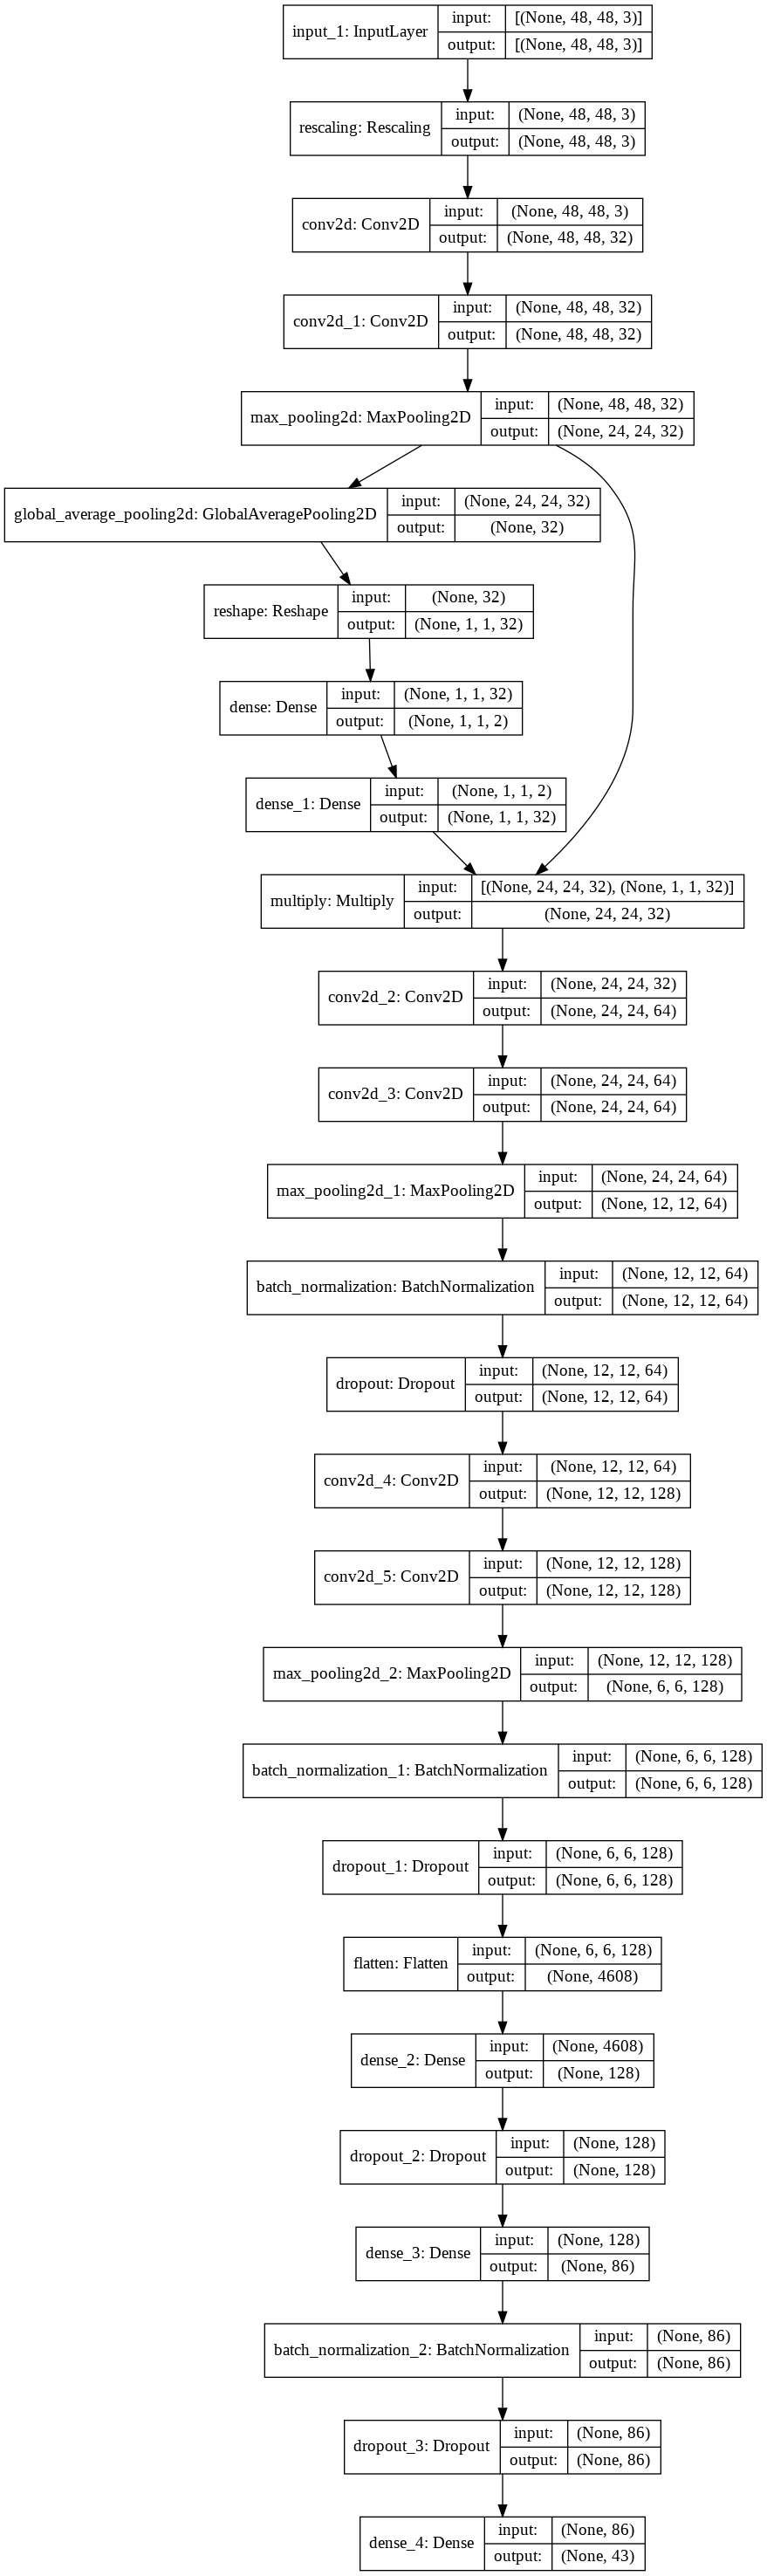

In [28]:
keras.utils.plot_model(model, show_shapes = True)

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 48, 48, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         rescaling[0][0]                  
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 48, 48, 32)   9248        conv2d[0][0]                     
______________________________________________________________________________________________

In [30]:
history = model.fit(train_ds, validation_data = val_ds,callbacks= [early_stopping_cb], epochs = 50)


Epoch 1/50
980/980 [==============================] - 48s 15ms/step - loss: 3.5322 - accuracy: 0.1653 - val_loss: 0.7580 - val_accuracy: 0.8021
Epoch 2/50
980/980 [==============================] - 9s 9ms/step - loss: 0.8089 - accuracy: 0.7709 - val_loss: 0.1175 - val_accuracy: 0.9725
Epoch 3/50
980/980 [==============================] - 9s 9ms/step - loss: 0.3042 - accuracy: 0.9146 - val_loss: 0.0492 - val_accuracy: 0.9852
Epoch 4/50
980/980 [==============================] - 9s 9ms/step - loss: 0.1933 - accuracy: 0.9461 - val_loss: 0.0296 - val_accuracy: 0.9903
Epoch 5/50
980/980 [==============================] - 9s 9ms/step - loss: 0.1290 - accuracy: 0.9657 - val_loss: 0.0201 - val_accuracy: 0.9934
Epoch 6/50
980/980 [==============================] - 9s 9ms/step - loss: 0.1079 - accuracy: 0.9686 - val_loss: 0.0220 - val_accuracy: 0.9916
Epoch 7/50
980/980 [==============================] - 9s 9ms/step - loss: 0.0949 - accuracy: 0.9740 - val_loss: 0.0075 - val_accuracy: 0.9980
Epoc

In [31]:
model.evaluate(test_ds)


124/124 [==============================] - 2s 15ms/step - loss: 0.0107 - accuracy: 0.9975


[0.010660086758434772, 0.9974676966667175]

### Implementation of SE_block in subclassing API

In [ ]:
class SE_block(keras.layers.Layer):
  """creates a squeeze and excitation block 
  squeeze block: GlobalAveragePooling2D()
 
  excitaion block: Dense()
 
  """
  def __init__(self, inputs, ratio = 16, **kwargs):
    super().__init__(*kwargs)
    self.input_tensor = inputs
    self.ratio = ratio
    self.num_filters = getattr(self.input_tensor, 'shape')[-1]
    self.SE_block_shape = (1,1, self.num_filters)
 
    self.squeeze_GlobalAvgPooling = keras.layers.GlobalAveragePooling2D()
    self.squeeze_Reshape = keras.layers.Reshape(self.SE_block_shape)
 
    self.excitation_Dense_1 = keras.layers.Dense(self.num_filters // self.ratio, activation = 'relu', 
                                  kernel_initializer = 'he_normal', use_bias = False)
    self.excitation_Dense_2 = keras.layers.Dense(self.num_filters, activation = 'sigmoid',
                                                 kernel_initializer = 'he_normal', use_bias= False)
    self.mutiply = keras.layers.Multiply()
    
 
  def call(self, inputs):
    Z = self.squeeze_GlobalAvgPooling(inputs)
    Z = self.squeeze_reshape(Z)
 
    Z = self.excitation_Dense_1(Z)
    Z = self.excitation_Dense_2(Z)
    return self.multiply([inputs, Z])

In [ ]:
class Conv_block(keras.layers.Layer):
  def __init__(self, conv_filters, )

In [ ]:
class GTRSB_model(keras.models.Model):
  

In [ ]:
squeeze_and_excitaiton_block = SE_block()

__main__.SE_block

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
                                 keras.layers.experimental.preprocessing.Rescaling(1./255,
                                                                                   input_shape= (img_height, img_width, 3)), 
                                 keras.layers.Conv2D(32, kernel_size=(3, 3), 
                                                     padding='same', activation= 'relu'), 
                                 keras.layers.Conv2D(32, kernel_size=(3, 3), 
                                                     padding='same', activation= 'relu'), 
                                 keras.layers.MaxPool2D(pool_size=(2, 2)), 
                                 SE_block(), 

                                 keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 keras.layers.BatchNormalization(), 
                                 keras.layers.Dropout(0.2),

                                 keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'),
                                 keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'),
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),

                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation= 'relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(86, activation = 'relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(43, activation = 'softmax')])


early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

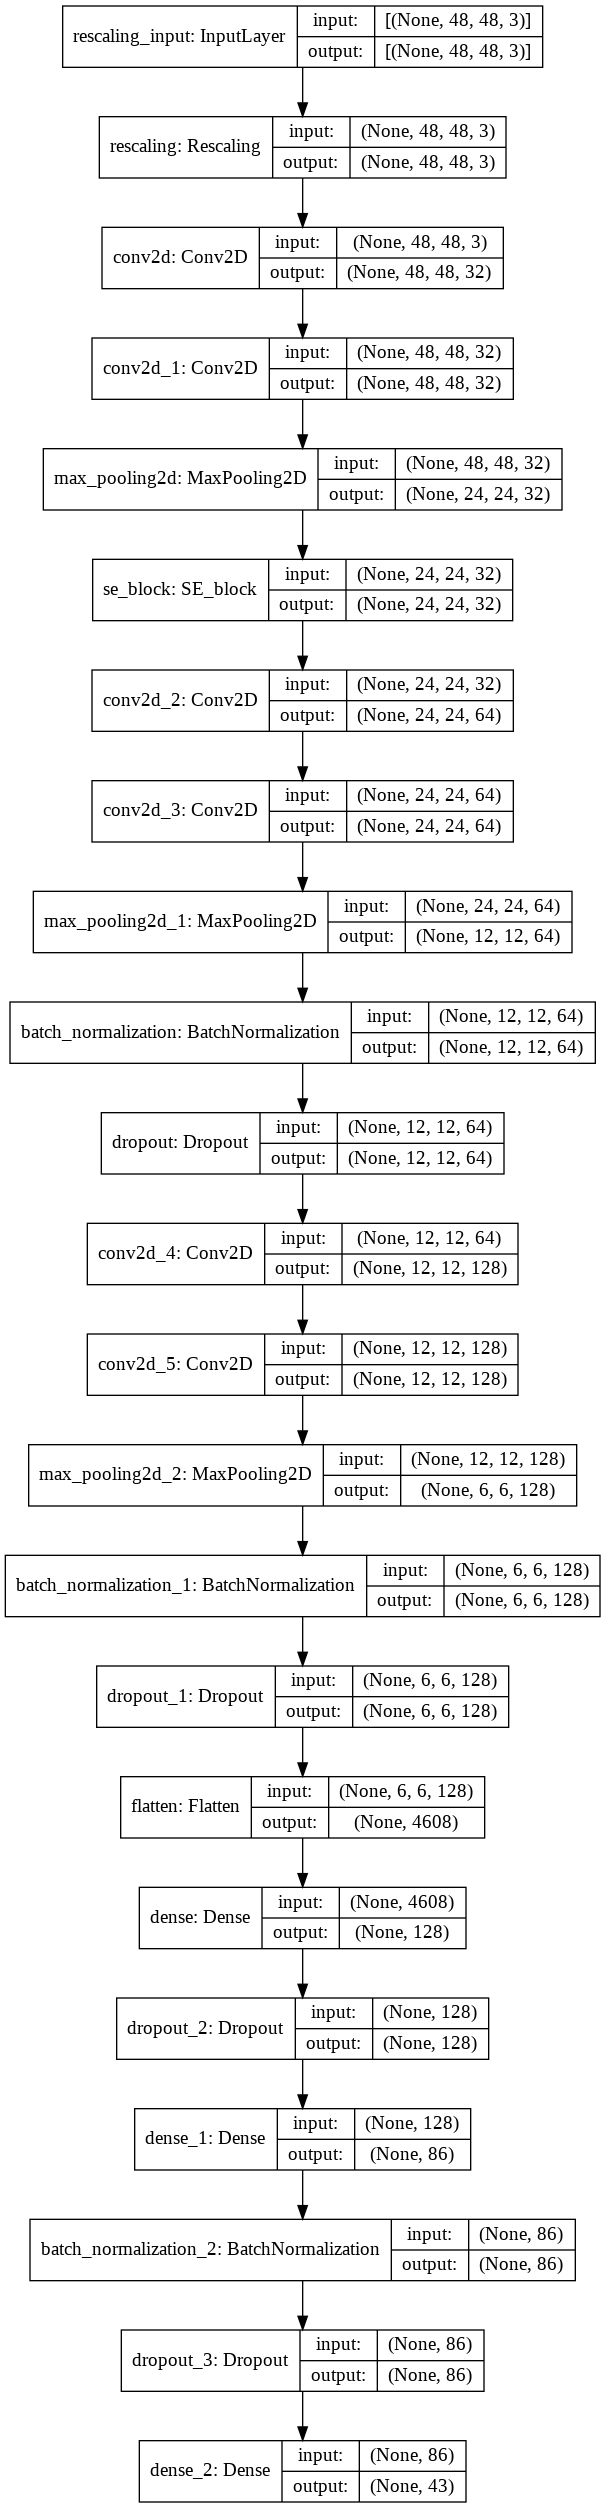

In [ ]:
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
history = model.fit(train_ds, validation_data = val_ds,callbacks= [early_stopping_cb], epochs = 50)

Epoch 1/50


ValueError: ignored

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
 
# input = keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape= (img_height, img_width, 3))
input = keras.layers.Input(shape= (img_height, img_width, 3))
 
rescale = keras.layers.experimental.preprocessing.Rescaling(1./255)(input)
 
conv1_1 = keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(rescale)
                                                  
conv1_2 = keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(conv1_1)
maxpool_1 = keras.layers.MaxPooling2D(pool_size= (2, 2))(conv1_2)
# BN_1 = keras.layers.BatchNormalization()(maxpool_1)
# dropout_1 = keras.layers.Dropout(0.2)(BN_1)
 
se_block = SE_block(maxpool_1)#(dropout_1)
 
 
conv2_1 = keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(se_block)
conv2_2 = keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(conv2_1)
maxpool_2 = keras.layers.MaxPooling2D(pool_size= (2, 2))(conv2_2)
BN_2 = keras.layers.BatchNormalization()(maxpool_2)
dropout_2 = keras.layers.Dropout(0.2)(BN_2)
 
 
conv3_1 = keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(dropout_2)
conv3_2 = keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu')(conv3_1)
maxpool_3 = keras.layers.MaxPooling2D(pool_size= (2, 2))(conv3_2)
BN_3 = keras.layers.BatchNormalization()(maxpool_3)
dropout_3 = keras.layers.Dropout(0.2)(BN_3)
 
 
Flatten = keras.layers.Flatten()(dropout_3)
Dense_1 = keras.layers.Dense(128, activation= 'relu')(Flatten)
dropout_4 = keras.layers.Dropout(0.5)(Dense_1)
Dense_2 = keras.layers.Dense(86, activation = 'relu')(dropout_4)
BN_4 = keras.layers.BatchNormalization()(Dense_2)
dropout_5 = keras.layers.Dropout(0.5)(BN_4)
output = keras.layers.Dense(43, activation = 'softmax')(dropout_5)
 
model = keras.models.Model(inputs= [input], outputs = [output])
  
 
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

TypeError: ignored

## Preprocess Image for prediction 

In [32]:
! wget 'https://www.rhinocarhire.com/CorporateSite/media/Drive-Smart/Road-Signs/Priority-Signs/Germany-Priority-Sign-Warning-for-a-crossroad-side-roads-on-the-left-and-right.png' -O test_img.jpg

--2021-03-26 09:20:50--  https://www.rhinocarhire.com/CorporateSite/media/Drive-Smart/Road-Signs/Priority-Signs/Germany-Priority-Sign-Warning-for-a-crossroad-side-roads-on-the-left-and-right.png
Resolving www.rhinocarhire.com (www.rhinocarhire.com)... 172.67.74.110, 104.26.12.108, 104.26.13.108, ...
Connecting to www.rhinocarhire.com (www.rhinocarhire.com)|172.67.74.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9956 (9.7K) [image/png]
Saving to: ‘test_img.jpg’

test_img.jpg        100%[===================>]   9.72K  --.-KB/s    in 0s      

2021-03-26 09:20:50 (41.5 MB/s) - ‘test_img.jpg’ saved [9956/9956]



In [33]:
test_image_path = os.path.join('/content/test_img.jpg')

In [34]:
def preproces_image(image_path):
  test_image = keras.preprocessing.image.load_img(image_path, target_size = (img_height, img_width))
  image_array = keras.preprocessing.image.img_to_array(test_image)
  img_batch = np.expand_dims(image_array, axis=0)
  predictions = model.predict(test_image)
  return train_class_names[np.argmax(predictions)]


In [35]:
test_image = preproces_image(test_image_path)

In [36]:
predictions = model.predict(test_image)

In [37]:
train_class_names[np.argmax(predictions)]

'00011_right_of_way_at_the'